In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

year = "2020"

path = "Datasets/WA-" + year + "-FBI-CDE/"

''' Some background, incidents can have multiple offenses. So we need to keep all offenses that occurred
during incidents in Seattle.

NIBRS offense codes to look for:
    Homocide
        09A - Murder and Nonnegligent Manslaughter
        09B - Negligent Manslaughter
    Rape
        11A - Rape
        11B - Sodomy
        11C - Sexual Assault With an Object
    Robbery
        120 - Robbery
    Assault (for Aggravated Assault do not include 13B or 13C)
        13A - Aggravated Assault 
        13B - Simple Assault
        13C - Intimidation
    Burglary
        220 - Burglary/Breaking and Entering
    Larceny/Theft
        23A - Pocket-picking
        23B - Purse-snatching
        23C - Shoplifting
        23D - Theft from Building
        23E - Theft from Coin-operated Machine or Device
        23F - Theft from Motor Vehicle
        23G - Theft of Motor Vehicle Parts or Accessories
        23H - All Other Larceny
    Motor Vehicle Theft
        240 - Motor Vehicle Theft

'''

' Some background, incidents can have multiple offenses. So we need to keep all offenses that occurred\nduring incidents in Seattle.\n\nNIBRS offense codes to look for:\n    Homocide\n        09A - Murder and Nonnegligent Manslaughter\n        09B - Negligent Manslaughter\n    Rape\n        11A - Rape\n        11B - Sodomy\n        11C - Sexual Assault With an Object\n    Robbery\n        120 - Robbery\n    Assault (for Aggravated Assault do not include 13B or 13C)\n        13A - Aggravated Assault \n        13B - Simple Assault\n        13C - Intimidation\n    Burglary\n        220 - Burglary/Breaking and Entering\n    Larceny/Theft\n        23A - Pocket-picking\n        23B - Purse-snatching\n        23C - Shoplifting\n        23D - Theft from Building\n        23E - Theft from Coin-operated Machine or Device\n        23F - Theft from Motor Vehicle\n        23G - Theft of Motor Vehicle Parts or Accessories\n        23H - All Other Larceny\n    Motor Vehicle Theft\n        240 - Motor

In [232]:
# Read in the incidents file
incidents = pd.read_csv(path + "NIBRS_incident.csv")
# Keep only the rows where the agency ID is 20900, this is Seattle PD
incidents = incidents.loc[incidents['AGENCY_ID'] == 20900]
# Keep only the incident ID series
incidents = incidents['INCIDENT_ID']
incidents

63954     134477576
63955     134477786
63956     124245625
63957     124247044
63958     124245706
            ...    
208350    135767120
208351    135765563
208352    135765565
208353    135765567
208354    135765570
Name: INCIDENT_ID, Length: 68239, dtype: int64

In [233]:
# Read in the offenses file
offenses = pd.read_csv(path + "NIBRS_OFFENSE.csv")
# Keep only the rows where the incident ID matches a value from the incidents series
offenses = offenses.loc[offenses['INCIDENT_ID'].isin(incidents)]
# Keep only a few necessary columns
offenses = offenses[['OFFENSE_ID', 'INCIDENT_ID', 'OFFENSE_TYPE_ID']]
offenses

,OFFENSE_ID,INCIDENT_ID,OFFENSE_TYPE_ID
76,150483813,124253233,40
86,150490345,124257466,47
87,150490351,124253886,7
88,150490357,124253890,14
92,150484683,124253933,45
...,...,...,...
457204,154233369,127587929,40
457205,154233403,127592648,45
457206,154228093,127592676,45
457207,154233468,127587965,44


In [234]:
# Read in a new file to add offenses based on offense IDs
offense_types = pd.read_csv(path + "NIBRS_OFFENSE_TYPE.csv")
# Trim the dataframe down to only the columns needed
offense_types = offense_types[['OFFENSE_TYPE_ID', 'OFFENSE_CODE', 'OFFENSE_NAME', 'CRIME_AGAINST', 'OFFENSE_CATEGORY_NAME']]
offense_types

,OFFENSE_TYPE_ID,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME
0,71,30A,Illegal Entry into the United States,Society,Other Offenses
1,72,30B,False Citizenship,Society,Other Offenses
2,73,30C,Smuggling Aliens,Society,Other Offenses
3,74,30D,Re-entry after Deportation,Society,Other Offenses
4,75,360,Failure to Register as a Sex Offender,Society,Other Offenses
...,...,...,...,...,...
81,68,26H,Money Laundering,Society,Other Offenses
82,36,11A,Rape,Person,Sex Offenses
83,50,23E,Theft From Coin-Operated Machine or Device,Property,Larceny/Theft Offenses
84,10,90D,Driving Under the Influence,Society,Driving Under the Influence


In [235]:
# Join the offenses and offense_types dataframes
offenses_expanded = pd.merge(offenses, offense_types, on='OFFENSE_TYPE_ID')
offenses_expanded

,OFFENSE_ID,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME
0,150483813,124253233,40,120,Robbery,Property,Robbery
1,150494602,124261031,40,120,Robbery,Property,Robbery
2,150498694,124267366,40,120,Robbery,Property,Robbery
3,154223083,127580825,40,120,Robbery,Property,Robbery
4,154227779,127591941,40,120,Robbery,Property,Robbery
...,...,...,...,...,...,...,...
71942,152579527,126062657,12,26D,Welfare Fraud,Property,Fraud Offenses
71943,160552337,133274172,31,39A,Betting/Wagering,Society,Gambling Offenses
71944,160553619,133276998,60,64B,"Human Trafficking, Involuntary Servitude",Person,Human Trafficking
71945,152573075,126056478,60,64B,"Human Trafficking, Involuntary Servitude",Person,Human Trafficking


In [236]:
''' Create a list that will be used to keep only offenses that the SRS would track.
        Note that several SRS offenses have been expanded in the NIBRS and have multiple NIBRS
        offense codes that correspond to the older classifications.

NIBRS offense codes to look for:
    Homocide
        09A - Murder and Nonnegligent Manslaughter
        09B - Negligent Manslaughter
    Rape
        11A - Rape
        11B - Sodomy
        11C - Sexual Assault With an Object
    Robbery
        120 - Robbery
    Assault (for Aggravated Assault do not include 13B or 13C)
        13A - Aggravated Assault 
        13B - Simple Assault
        13C - Intimidation
    Burglary
        220 - Burglary/Breaking and Entering
    Larceny/Theft
        23A - Pocket-picking
        23B - Purse-snatching
        23C - Shoplifting
        23D - Theft from Building
        23E - Theft from Coin-operated Machine or Device
        23F - Theft from Motor Vehicle
        23G - Theft of Motor Vehicle Parts or Accessories
        23H - All Other Larceny
    Motor Vehicle Theft
        240 - Motor Vehicle Theft
'''
codes = ['09A', '09B', '11A', '11B', '11C', '120', '13A', '13B', '13C', '220',
         '23A', '23B', '23C', '23D', '23E', '23F', '23G', '23H', '240']

offenses_grouped = offenses_expanded.loc[offenses_expanded['OFFENSE_CODE'].isin(codes)]
offenses_grouped

,OFFENSE_ID,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME
0,150483813,124253233,40,120,Robbery,Property,Robbery
1,150494602,124261031,40,120,Robbery,Property,Robbery
2,150498694,124267366,40,120,Robbery,Property,Robbery
3,154223083,127580825,40,120,Robbery,Property,Robbery
4,154227779,127591941,40,120,Robbery,Property,Robbery
...,...,...,...,...,...,...,...
71928,163525628,135768253,38,09B,Negligent Manslaughter,Person,Homicide Offenses
71929,163524670,135767520,38,09B,Negligent Manslaughter,Person,Homicide Offenses
71930,160549292,133273428,38,09B,Negligent Manslaughter,Person,Homicide Offenses
71931,163519165,135765384,38,09B,Negligent Manslaughter,Person,Homicide Offenses


In [237]:
pd.DataFrame(offenses_grouped['INCIDENT_ID'].unique()).count()

0    48883
dtype: int64

In [238]:
# OFFENSE_CATEGORY_NAME now breaks down the offenses into the groups we need, these are NIBRS
#   categories that translate neatly into SRS classifications
categories = offenses_grouped['OFFENSE_CATEGORY_NAME'].unique().tolist()
categories

['Robbery',
 'Larceny/Theft Offenses',
 'Motor Vehicle Theft',
 'Assault Offenses',
 'Burglary/Breaking & Entering',
 'Sex Offenses',
 'Homicide Offenses']

In [239]:
# Now create NIBRS totals for each category
totals_NIBRS = offenses_grouped['OFFENSE_CATEGORY_NAME'].value_counts()
totals_NIBRS

Larceny/Theft Offenses          23258
Burglary/Breaking & Entering    10417
Assault Offenses                10078
Motor Vehicle Theft              4915
Robbery                          1477
Sex Offenses                      310
Homicide Offenses                  54
Name: OFFENSE_CATEGORY_NAME, dtype: int64

In [240]:
# Now create SRS totals for each category, in order to do this we have to count only the highest
#   priority offense that occurred during each incident. The priority is as follows:
#   Homocide > Rape > Robbery > Assault > Burglary > Larceny > Motor Vehicle Theft

# Break the dataframe up into individual datsframes 
grouped = offenses_grouped.groupby(['OFFENSE_CATEGORY_NAME'])
larceny = grouped.get_group("Larceny/Theft Offenses")
burglary = grouped.get_group("Burglary/Breaking & Entering")
assault = grouped.get_group("Assault Offenses")
motor_theft = grouped.get_group("Motor Vehicle Theft")
robbery = grouped.get_group("Robbery")
sex_offenses = grouped.get_group("Sex Offenses")
homicide = grouped.get_group("Homicide Offenses")

# Concatenate them back together in priority order
unique_incidents = pd.concat([homicide, sex_offenses, robbery, assault, burglary, larceny, motor_theft])
# Use drop duplicates to only keep the first occurance of each incident ID
unique_incidents.drop_duplicates(subset=['INCIDENT_ID'], inplace=True)
unique_incidents

,OFFENSE_ID,INCIDENT_ID,OFFENSE_TYPE_ID,OFFENSE_CODE,OFFENSE_NAME,CRIME_AGAINST,OFFENSE_CATEGORY_NAME
71710,154221650,127581591,32,09A,Murder and Nonnegligent Manslaughter,Person,Homicide Offenses
71711,154221656,127581599,32,09A,Murder and Nonnegligent Manslaughter,Person,Homicide Offenses
71712,163525941,135768534,32,09A,Murder and Nonnegligent Manslaughter,Person,Homicide Offenses
71713,163524735,135767569,32,09A,Murder and Nonnegligent Manslaughter,Person,Homicide Offenses
71714,156618764,129787831,32,09A,Murder and Nonnegligent Manslaughter,Person,Homicide Offenses
...,...,...,...,...,...,...,...
26380,154227957,127592383,21,240,Motor Vehicle Theft,Property,Motor Vehicle Theft
26381,154227965,127592402,21,240,Motor Vehicle Theft,Property,Motor Vehicle Theft
26382,154233262,127587883,21,240,Motor Vehicle Theft,Property,Motor Vehicle Theft
26384,154233503,127587984,21,240,Motor Vehicle Theft,Property,Motor Vehicle Theft


In [241]:
# Now create SRS totals for each category
totals_SRS = unique_incidents['OFFENSE_CATEGORY_NAME'].value_counts()
totals_SRS

Larceny/Theft Offenses          22719
Burglary/Breaking & Entering    10320
Assault Offenses                 9825
Motor Vehicle Theft              4196
Robbery                          1471
Sex Offenses                      298
Homicide Offenses                  54
Name: OFFENSE_CATEGORY_NAME, dtype: int64

In [242]:
# Combine the series into a dataframe
both_totals = pd.merge(totals_NIBRS, totals_SRS, left_index=True, right_index=True)
# both_totals = both_totals.reset_index()
# Rename the columns
both_totals.rename(columns={'OFFENSE_CATEGORY_NAME_x': 'NIBRS Totals', 'OFFENSE_CATEGORY_NAME_y': 'SRS Totals'}, inplace=True)
# Add a new column that calculates the percent increase in each category from SRS to NIBRS figures
both_totals['Percent Increase'] = (both_totals['NIBRS Totals'] - both_totals['SRS Totals']) / both_totals['SRS Totals'] * 100
both_totals['Percent Increase'] = round(both_totals['Percent Increase'], 2)
# Transpose the dataframe
#both_totals = both_totals.T
both_totals

,NIBRS Totals,SRS Totals,Percent Increase
Larceny/Theft Offenses,23258,22719,2.37
Burglary/Breaking & Entering,10417,10320,0.94
Assault Offenses,10078,9825,2.58
Motor Vehicle Theft,4915,4196,17.14
Robbery,1477,1471,0.41
Sex Offenses,310,298,4.03
Homicide Offenses,54,54,0.00


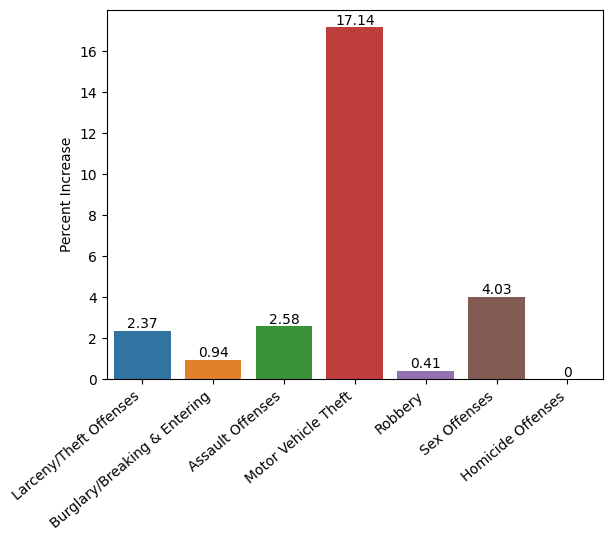

In [243]:
# Create a bar chart showing the percent increase in each offense category
ax = sns.barplot(x = both_totals.index, y = 'Percent Increase', data=both_totals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.bar_label(ax.containers[0])
plt.show()

In [244]:
# Save the figure as a file
fig = ax.get_figure()
fig.savefig("Figure_1.png")

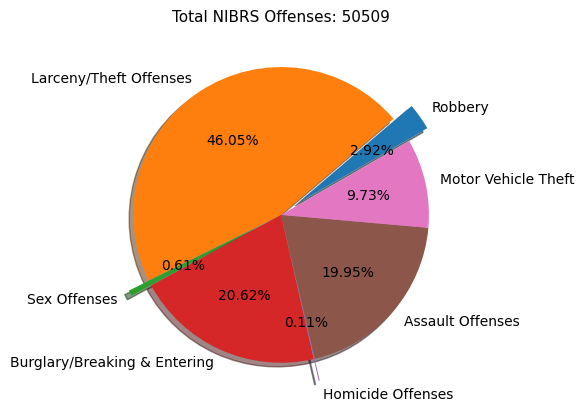

In [245]:
# Reorganize the index so the small slices are separated from one another, reducing clutter
both_totals2 = both_totals.reindex(index=['Robbery', 'Larceny/Theft Offenses', 'Sex Offenses', 'Burglary/Breaking & Entering', 'Homicide Offenses', 'Assault Offenses', 'Motor Vehicle Theft'])
both_totals2
# Create pie charts NIBRS showing offense totals
explode = (.15, 0, .15, 0, .15, 0, 0)
plt.pie(both_totals2['NIBRS Totals'], labels=both_totals2.index, autopct='%1.2f%%', startangle=30, explode=explode, shadow=True)
plt.title("Total NIBRS Offenses: " + str(both_totals2['NIBRS Totals'].sum()), fontsize=11)
plt.show()

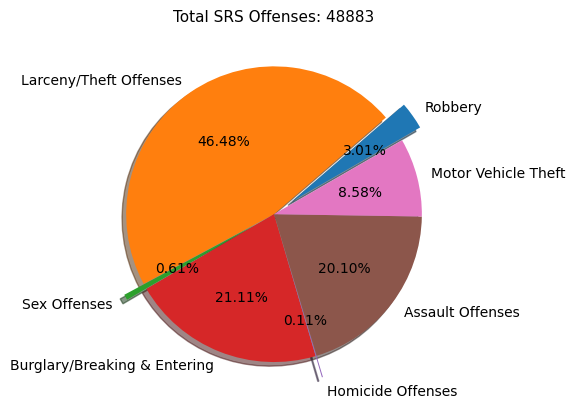

In [246]:
# Create pie charts NIBRS showing offense totals
explode = (.15, 0, .15, 0, .15, 0, 0)
plt.pie(both_totals2['SRS Totals'], labels=both_totals2.index, autopct='%1.2f%%', startangle=30, explode=explode, shadow=True)
plt.title("Total SRS Offenses: " + str(both_totals2['SRS Totals'].sum()), fontsize=11)
plt.show()

In [247]:
# Make the index into a new column
both_totals_final = both_totals.reset_index()
both_totals_final = both_totals_final.rename(columns={'index': 'Offense Type'})
# Add a totals row to the final data set
new_row = {'Offense Type': 'Total', 'NIBRS Totals': both_totals['NIBRS Totals'].sum(), 'SRS Totals': both_totals['SRS Totals'].sum(), 'Percent Increase': 0}
both_totals_final = both_totals_final.append(new_row, ignore_index=True)
# Calculate the percent increase for total offenses
both_totals_final.iat[7, 3] = (both_totals_final['NIBRS Totals'].iat[7] - both_totals_final['SRS Totals'].iat[7]) / both_totals_final['SRS Totals'].iat[7] * 100
both_totals_final['Percent Increase'] = round(both_totals_final['Percent Increase'], 2)
both_totals_final


C:\Users\wiggi\AppData\Local\Temp\ipykernel_36464\2374712966.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  both_totals_final = both_totals_final.append(new_row, ignore_index=True)


,Offense Type,NIBRS Totals,SRS Totals,Percent Increase
0,Larceny/Theft Offenses,23258,22719,2.37
1,Burglary/Breaking & Entering,10417,10320,0.94
2,Assault Offenses,10078,9825,2.58
3,Motor Vehicle Theft,4915,4196,17.14
4,Robbery,1477,1471,0.41
5,Sex Offenses,310,298,4.03
6,Homicide Offenses,54,54,0.00
7,Total,50509,48883,3.33


In [248]:
# Output the dataframe
both_totals_final.to_csv("Datasets/" + year + "_compiled.csv")